In [1]:
import pandas as pd 
import numpy as np

from PIL import Image
import requests
from io import BytesIO

from tqdm import tqdm

from sklearn.feature_extraction.text import CountVectorizer

from sklearn.metrics import pairwise_distances

In [2]:
df = pd.read_csv('books_dataset.csv')
df.sample(7)

bookId                          title  \
9144                  477990.Summer_of_Fear                 Summer of Fear   
11991            21412400-the-first-bad-man              The First Bad Man   
48327                28483.The_Seventh_Gate               The Seventh Gate   
23907                         8430015-pages                          Pages   
47086                              38714144                        نوبت من   
34782                       10593908-akasha                         Akasha   
12226  885387.Does_My_Bum_Look_Big_in_This_  Does My Bum Look Big in This?   

                        series  \
9144                       NaN   
11991                      NaN   
48327  The Death Gate Cycle #7   
23907                      NaN   
47086                      NaN   
34782                Akasha #1   
12226                      NaN   

                                                  author  rating  \
9144                                         Lois Duncan    3.82   
11991                    Miranda July (Goodreads Author)    3.61   
48327  Margaret Weis (Goodreads Author), Tracy Hickma...    4.11   
23907                    S.J. Johnson (Goodreads Author)    4.70   
47086            Johan Cruyff, ماشااله صفری (Translator)    3.58   
34782               Heather Tregaskes (Goodreads Author)    3.97   
12226                                      Arabella Weir    3.04   

                                             description language  \
9144   Why is Rachel the only one to sense the evil t...  English   
11991  From the acclaimed filmmaker, artist, and best...  English   
48327  The Seventh Gate is the thrilling conclusion t...  English   
23907  A collection of four very different timeless n...  English   
47086  Johan Cruyff is widely regarded as one of the ...  Persian   
34782  In 1880, superstitions in Nichole's small New ...  English   
12226  Jacqueline M. Pane is an ordinary woman in her...  English   

                isbn                                             genres  \
9144   9780440983248  ['Young Adult', 'Horror', 'Fiction', 'Mystery'...   
11991  9781439172568  ['Fiction', 'Contemporary', 'Novels', 'Literar...   
48327  9780553573251  ['Fantasy', 'Fiction', 'Epic Fantasy', 'Scienc...   
23907     B003IX0GTQ                                                 []   
47086  9789645948885  ['Biography', 'Sports', 'Football', 'Nonfictio...   
34782  9781456579937  ['Fantasy', 'Young Adult', 'Historical', 'Para...   
12226  9780340689486  ['Chick Lit', 'Fiction', 'Romance', 'Humor', '...   

                                              characters  ...  \
9144                                                  []  ...   
11991                                                 []  ...   
48327                                          ['Haplo']  ...   
23907                                                 []  ...   
47086                                                 []  ...   
34782                                                 []  ...   
12226  ['Andy Warner', 'Jacqueline M. Pane', 'Carlo P...  ...   

      firstPublishDate                                             awards  \
9144          10/28/76  ["Dorothy Canfield Fisher Children's Book Awar...   
11991              NaN  ['The Center for Fiction First Novel Prize Nom...   
48327         08/01/94                                                 []   
23907              NaN                                                 []   
47086         10/10/16  ['Publieksprijs voor het Nederlandse Boek Nomi...   
34782         02/17/11                                                 []   
12226         10/29/97                                                 []   

      numRatings                            ratingsByStars likedPercent  \
9144        5028     ['1388', '1765', '1504', '314', '57']         93.0   
11991      23759  ['5515', '8363', '6217', '2536', '1128']         85.0   
48327      17648    ['7132', '6385', '3295', '687', '149']         95.0   
23

In [3]:
max(df['rating'])

5.0

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52478 entries, 0 to 52477
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   bookId            52478 non-null  object 
 1   title             52478 non-null  object 
 2   series            23470 non-null  object 
 3   author            52478 non-null  object 
 4   rating            52478 non-null  float64
 5   description       51140 non-null  object 
 6   language          48672 non-null  object 
 7   isbn              52478 non-null  object 
 8   genres            52478 non-null  object 
 9   characters        52478 non-null  object 
 10  bookFormat        51005 non-null  object 
 11  edition           4955 non-null   object 
 12  pages             50131 non-null  object 
 13  publisher         48782 non-null  object 
 14  publishDate       51598 non-null  object 
 15  firstPublishDate  31152 non-null  object 
 16  awards            52478 non-null  object

# data preprocessing

In [5]:
# we will use genre column for book recommendation
# so we will clean genre column data

In [6]:
aa = df['genres'][0]
aa

"['Young Adult', 'Fiction', 'Dystopia', 'Fantasy', 'Science Fiction', 'Romance', 'Adventure', 'Teen', 'Post Apocalyptic', 'Action']"

In [7]:
type(aa)

str

In [8]:
def genre_cleaning(aa):
    
    temp1 = aa.split(',')
    
    temp2 = [i.strip() for i in temp1]
    
    
    temp3 = []
    for i in temp2:
        temp = ""
        for j in i:
            if j.isalpha() == True or j == " ":
                
                temp = temp + j
        
        temp3.append(temp)
        
        
    
    temp4 = [i.replace(" ", "_").lower() for i in temp3]
    
    temp5 = " ".join(temp4)
    
    return temp5


In [9]:
dd = genre_cleaning(df['genres'][0])
# dd[1][0]
dd 

'young_adult fiction dystopia fantasy science_fiction romance adventure teen post_apocalyptic action'

In [10]:
temp = df['genres']

counter = 0


for i in temp:
    df.at[counter, 'genres'] = genre_cleaning(i)
    counter = counter + 1
    


# featurizin genre using bag of word technique

In [11]:
bow = CountVectorizer()
bow.fit(df['genres'])
bow_vec = bow.transform(df['genres'])

In [12]:
len(bow.get_feature_names())

c:\python38\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


971

# book recommendation model 

In [13]:
def recommendation(book_lst, book_id):
    
    cosine_dist = pairwise_distances(book_lst, book_lst[book_id],metric='cosine')
    
    # np.argsort return index according to sorting means let we have 100 as max number in our array and its index is 14
    # so it will return new array whose first element will be 14
    
    return np.argsort(cosine_dist.flatten())[1:20]
    

In [14]:
recommendation(bow_vec, 10000)

array([38663,  9235, 39037,  8325, 21161, 51865, 13509, 29448, 27200,
       38016, 15463, 23349, 25436, 19861, 21408, 30156, 31994, 26249,
       33088], dtype=int64)

In [15]:
def image_downloader(url):
    
    response = requests.get(url)
    img = Image.open(BytesIO(response.content))
    
    return img

In [16]:
def model(book_lst, book_id):
    dd = recommendation(book_lst, book_id)
    
    display("Book selected By you")
    display(f"Book name: {df['title'][book_id]}")
    display(f"Book Author: {df['author'][book_id]}")
    display(f"Book rating: {df['rating'][book_id]}")
    display(f"Book Genre: {df['genres'][book_id]}")
    
    display(image_downloader(df['coverImg'][book_id]))
    
    display("Recommendation book on basis of book selected by you")
    
    for i in dd:
        
        display(f"Book name: {df['title'][i]}")
        display(f"Book Author: {df['author'][i]}")
        display(f"Book rating: {df['rating'][i]}")
        display(f"Book Genre: {df['genres'][i]}")
        display(image_downloader(df['coverImg'][i]))

Enter book id: 7896


'Book selected By you'

"Book name: Finger Lickin' Fifteen"

'Book Author: Janet Evanovich (Goodreads Author)'

'Book rating: 4.0'

'Book Genre: mystery fiction humor chick_lit romance crime comedy adult mystery_thriller audiobook'

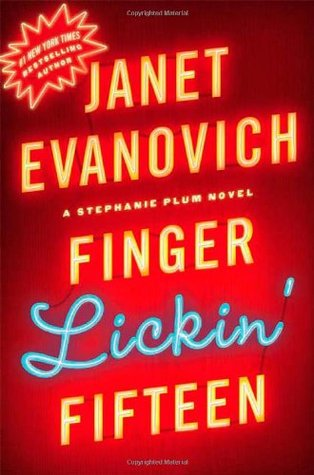

'Recommendation book on basis of book selected by you'

'Book name: Notorious Nineteen'

'Book Author: Janet Evanovich (Goodreads Author)'

'Book rating: 3.94'

'Book Genre: mystery fiction humor chick_lit romance crime audiobook adult mystery_thriller comedy'

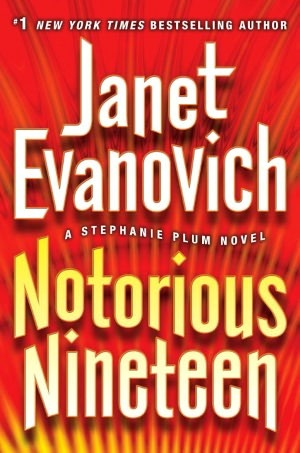

'Book name: Explosive Eighteen'

'Book Author: Janet Evanovich (Goodreads Author)'

'Book rating: 3.95'

'Book Genre: mystery fiction humor chick_lit romance crime audiobook comedy adult mystery_thriller'

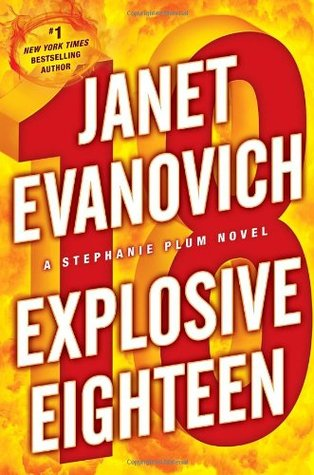

"Book name: Finger Lickin' Fifteen"

'Book Author: Janet Evanovich (Goodreads Author)'

'Book rating: 4.0'

'Book Genre: mystery fiction humor chick_lit romance crime comedy adult mystery_thriller audiobook'

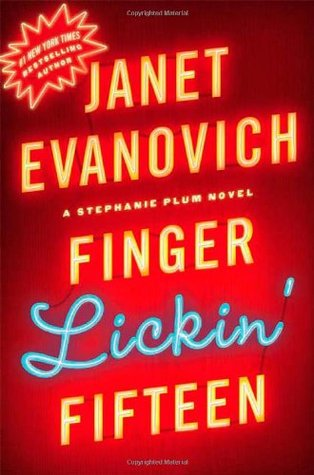

'Book name: Plum Lucky'

'Book Author: Janet Evanovich (Goodreads Author)'

'Book rating: 3.75'

'Book Genre: mystery fiction humor chick_lit romance comedy crime audiobook contemporary mystery_thriller'

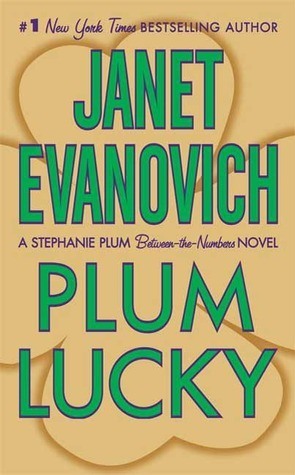

'Book name: Four to Score'

'Book Author: Janet Evanovich (Goodreads Author)'

'Book rating: 4.17'

'Book Genre: mystery fiction humor chick_lit romance crime comedy mystery_thriller contemporary adult'

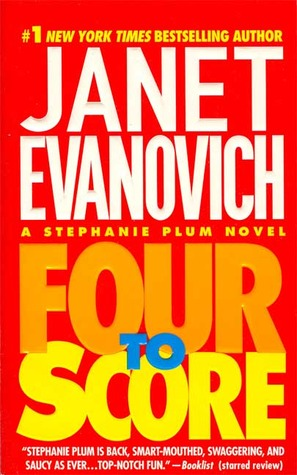

'Book name: Lean Mean Thirteen'

'Book Author: Janet Evanovich (Goodreads Author)'

'Book rating: 4.09'

'Book Genre: mystery fiction humor chick_lit romance crime comedy mystery_thriller contemporary adult'

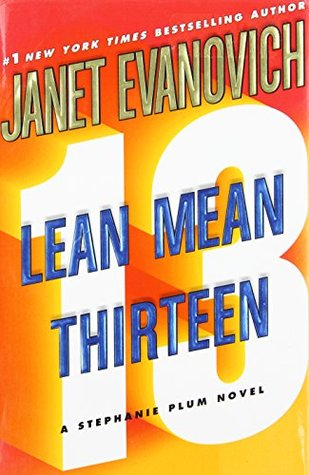

'Book name: Two for the Dough'

'Book Author: Janet Evanovich (Goodreads Author)'

'Book rating: 4.11'

'Book Genre: mystery fiction humor chick_lit romance crime mystery_thriller comedy contemporary adult'

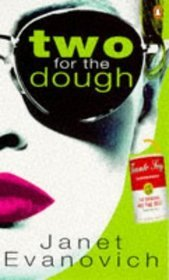

'Book name: Metro Girl'

'Book Author: Janet Evanovich (Goodreads Author)'

'Book rating: 3.63'

'Book Genre: mystery romance fiction chick_lit humor contemporary comedy crime audiobook mystery_thriller'

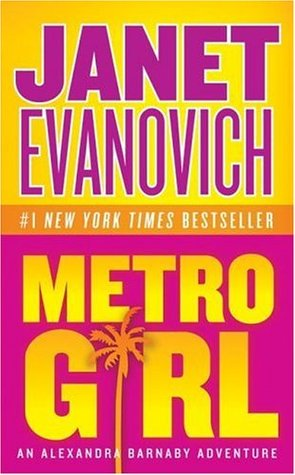

'Book name: Eleven on Top'

'Book Author: Janet Evanovich (Goodreads Author)'

'Book rating: 4.16'

'Book Genre: mystery fiction humor chick_lit romance crime comedy mystery_thriller contemporary adult'

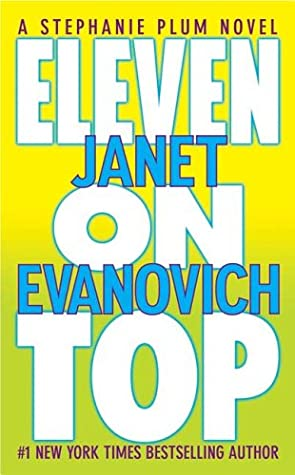

'Book name: One for the Money'

'Book Author: Janet Evanovich (Goodreads Author)'

'Book rating: 4.04'

'Book Genre: mystery fiction humor chick_lit romance crime mystery_thriller contemporary adult comedy'

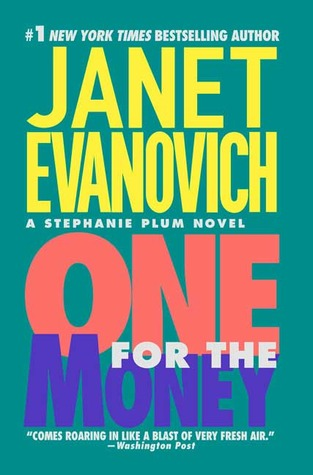

'Book name: Twelve Sharp'

'Book Author: Janet Evanovich (Goodreads Author)'

'Book rating: 4.15'

'Book Genre: mystery fiction humor chick_lit romance crime comedy mystery_thriller contemporary adult'

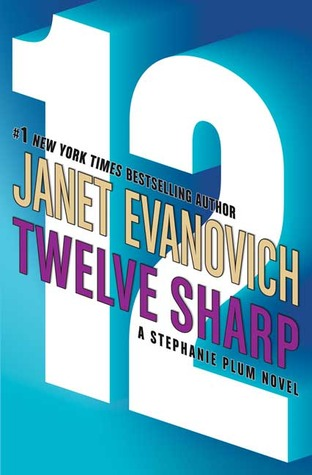

'Book name: Sizzling Sixteen'

'Book Author: Janet Evanovich (Goodreads Author)'

'Book rating: 3.95'

'Book Genre: mystery fiction humor chick_lit romance crime comedy audiobook contemporary mystery_thriller'

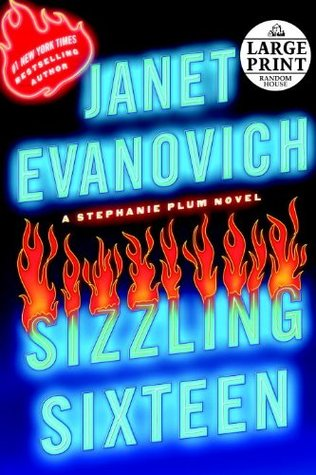

"Book name: Plum Lovin'"

'Book Author: Janet Evanovich (Goodreads Author)'

'Book rating: 3.73'

'Book Genre: mystery fiction humor chick_lit romance comedy crime contemporary mystery_thriller adult'

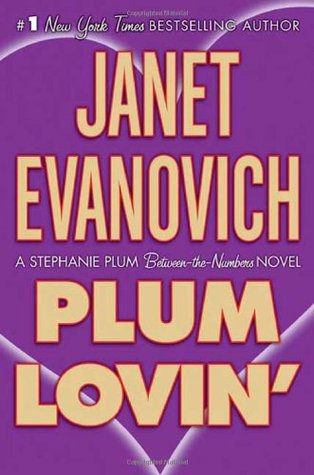

'Book name: Hard Eight'

'Book Author: Janet Evanovich (Goodreads Author), Lorelei King (Narrator)'

'Book rating: 4.17'

'Book Genre: mystery fiction humor chick_lit romance crime comedy mystery_thriller contemporary adult'

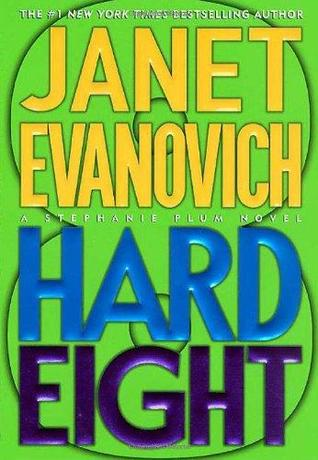

'Book name: Seven Up'

'Book Author: Janet Evanovich (Goodreads Author)'

'Book rating: 4.16'

'Book Genre: mystery fiction humor chick_lit romance crime comedy mystery_thriller contemporary adult'

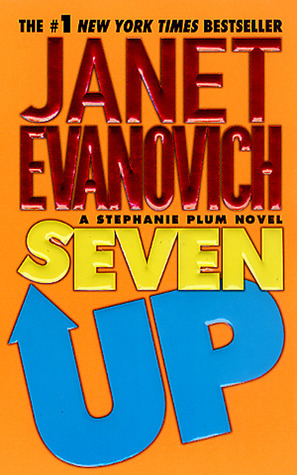

'Book name: To the Nines'

'Book Author: Janet Evanovich (Goodreads Author)'

'Book rating: 4.17'

'Book Genre: mystery fiction humor chick_lit romance crime comedy mystery_thriller adult contemporary'

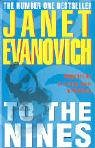

'Book name: Ten Big Ones'

'Book Author: Janet Evanovich (Goodreads Author)'

'Book rating: 4.14'

'Book Genre: mystery fiction humor chick_lit romance crime comedy mystery_thriller contemporary adult'

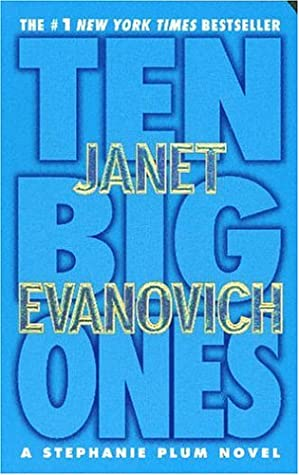

'Book name: High Five'

'Book Author: Janet Evanovich (Goodreads Author)'

'Book rating: 4.18'

'Book Genre: mystery fiction humor chick_lit romance crime comedy contemporary mystery_thriller adult'

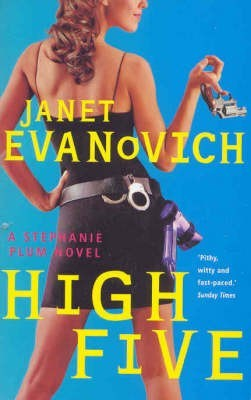

'Book name: Hot Six'

'Book Author: Janet Evanovich (Goodreads Author)'

'Book rating: 4.19'

'Book Genre: mystery fiction humor chick_lit romance crime comedy adult contemporary mystery_thriller'

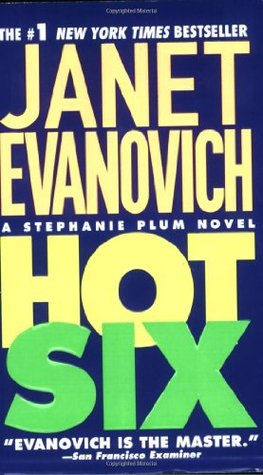

In [18]:
book_id_ = int(input("Enter book id: "))

model(book_lst=bow_vec, book_id=book_id_)

# rough work

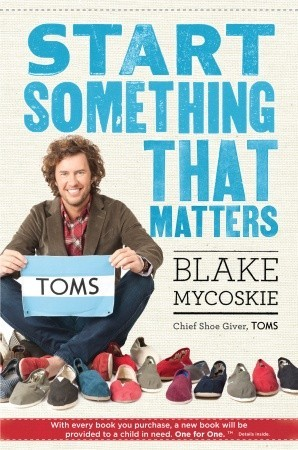

In [44]:

response = requests.get(url)
img = Image.open(BytesIO(response.content))
img

In [74]:
counter = 0

for i in df['title']:
#     print(i)
    temp = i.split(" ")
#     print(temp)


    for j in temp:
        
        if j.lower()=='matters':
            print(i, counter)
            
            
    counter = counter + 1

Song Bird: Matters of the Heart 2272
Being Mortal: Medicine and What Matters in the End 4640
Family Matters 5088
Start Something That Matters 10000
When Love Matters Most 11673
All That Matters 13836
Start: Punch Fear in the Face, Escape Average and Do Work that Matters 14785
All That Matters 16065
JFK and the Unspeakable: Why He Died and Why It Matters 18224
Counterfeit Gods: The Empty Promises of Money, Sex, and Power, and the Only Hope That Matters 18742
All That Matters 20524
A Liberated Mind: How to Pivot Toward What Matters 23398
What Matters Most is How Well You Walk Through the Fire 25366
unChristian: What a New Generation Really Thinks about Christianity... and Why It Matters 25658
Mike Nelson's Mind over Matters 25748
Living in Light of Eternity: How to base your life on what really matters (The Christian Character Library) 26263
Why Race Matters 27134
The Power of Meaning: Crafting a Life That Matters 27172
Hidden Treasures: Heaven's Astonishing Help with Your Money Matters 

In [15]:
df.head(5)

bookId  \
0                     2767052-the-hunger-games   
1  2.Harry_Potter_and_the_Order_of_the_Phoenix   
2                   2657.To_Kill_a_Mockingbird   
3                     1885.Pride_and_Prejudice   
4                               41865.Twilight   

                                       title                 series  \
0                           The Hunger Games    The Hunger Games #1   
1  Harry Potter and the Order of the Phoenix        Harry Potter #5   
2                      To Kill a Mockingbird  To Kill a Mockingbird   
3                        Pride and Prejudice                    NaN   
4                                   Twilight   The Twilight Saga #1   

                                      author  rating  \
0                            Suzanne Collins    4.33   
1  J.K. Rowling, Mary GrandPré (Illustrator)    4.50   
2                                 Harper Lee    4.28   
3  Jane Austen, Anna Quindlen (Introduction)    4.26   
4                            Stephenie Meyer    3.60   

                                         description language           isbn  \
0  WINNING MEANS FAME AND FORTUNE.LOSING MEANS CE...  English  9780439023481   
1  There is a door at the end of a silent corrido...  English  9780439358071   
2  The unforgettable novel of a childhood in a sl...  English  9999999999999   
3  Alternate cover edition of ISBN 9780679783268S...  English  9999999999999   
4  About three things I was absolutely positive.\...  English  9780316015844   

                                              genres  \
0  'young_adult fiction dystopia fantasy science_...   
1  'fantasy young_adult fiction magic childrens a...   
2  'classics fiction historical_fiction school li...   
3  'classics fiction romance historical_fiction l...   
4  'young_adult fantasy romance vampires fiction ...   

                                          characters  ... firstPublishDate  \
0  ['Katniss Everdeen', 'Peeta Mellark', 'Cato (H...  ...              NaN   
1  ['Sirius Black', 'Draco Malfoy', 'Ron Weasley'...  ...         06/21/03   
2  ['Scout Finch', 'Atticus Finch', 'Jem Finch', ...  ...         07/11/60   
3  ['Mr. Bennet', 'Mrs. Bennet', 'Jane Bennet', '...  ...         01/28/13   
4  ['Edward Cullen', 'Jacob Black', 'Laurent', 'R...  ...         10/05/05   

                                              awards numRatings  \
0  ['Locus Award Nominee for Best Young Adult Boo...    6376780   
1  ['Bram Stoker Award for Works for Young Reader...    2507623   
2  ['Pulitzer Prize for Fiction (1961)', 'Audie A...    4501075   
3                                                 []    2998241   
4  ['Georgia Peach Book Award (2007)', 'Buxtehude...    4964519   

                                      ratingsByStars likedPercent  \
0  ['3444695', '1921313', '745221', '171994', '93...         96.0   
1  ['1593642', '637516', '222366', '39573', '14526']         98.0   
2  ['2363896', '1333153', '573280', '149952', '80...         95.0   
3  ['1617567', '816659', '373311', '113934', '767...         94.0   
4  ['1751460', '1113682', '1008686', '542017', '5...         78.0   

                                             setting  \
0  ['District 12, Panem', 'Capitol, Panem', 'Pane...   
1  ['Hogwarts School of Witchcraft and Wizardry (...   
2               ['Maycomb, Alabama (United States)']   
3  ['United Kingdom', 'Derbyshire, England (Unite...   
4  ['Forks, Washington (United States)', 'Phoenix...   

                                            coverImg  bbeScore bbeVotes  price  
0  https://i.gr-assets.com/images/S/compressed.ph...   2993816    30516   5.09  
1  https://i.gr-assets.com/images/S/compressed.ph...   2632233    26923   7.38  
2  https://i.gr-assets.com/images/S/compressed.ph...   2269402    23328    NaN  
3  https://i.gr-assets.com/images/S/compressed.ph...   1983116    20452    NaN  
4  https://i.gr-assets.com/images/S/compressed.ph...   1459448    14874    2.1  

[5 rows x 25 columns]

In [16]:
df['genres']

0        'young_adult fiction dystopia fantasy science_...
1        'fantasy young_adult fiction magic childrens a...
2        'classics fiction historical_fiction school li...
3        'classics fiction romance historical_fiction l...
4        'young_adult fantasy romance vampires fiction ...
                               ...                        
52473    'vampires paranormal young_adult romance fanta...
52474                                'mystery young_adult'
52475    'fantasy young_adult paranormal angels romance...
52476    'fiction mystery historical_fiction adventure ...
52477    'lds_fiction historical_fiction young_adult fi...
Name: genres, Length: 52478, dtype: object

CountVectorizer()

In [19]:
bow.get_feature_names()

c:\python38\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['10th_century',
 '11th_century',
 '12th_century',
 '13th_century',
 '14th_century',
 '15th_century',
 '16th_century',
 '17th_century',
 '18th_century',
 '19th_century',
 '1st_grade',
 '20th_century',
 '21st_century',
 '2nd_grade',
 '40k',
 'abuse',
 'academia',
 'academic',
 'academics',
 'action',
 'activism',
 'adolescence',
 'adoption',
 'adult',
 'adult_fiction',
 'adventure',
 'aeroplanes',
 'africa',
 'african_american',
 'african_american_literature',
 'african_american_romance',
 'african_literature',
 'agriculture',
 'aircraft',
 'airships',
 'albanian_literature',
 'alchemy',
 'alcohol',
 'alexandria',
 'algebra',
 'algeria',
 'algorithms',
 'aliens',
 'alternate_history',
 'alternate_universe',
 'alternative_medicine',
 'amateur_sleuth',
 'amazon',
 'american',
 'american_civil_war',
 'american_classics',
 'american_fiction',
 'american_history',
 'american_revolution',
 'american_revolutionary_war',
 'americana',
 'amish',
 'amish_fiction',
 'anarchism',
 'ancient',
 'anci

In [37]:
type(cosine_dist)

numpy.ndarray

In [39]:
np.argsort(cosine_dist.flatten())

array([  126,     1,    93, ..., 34470, 18117, 26238], dtype=int64)

In [40]:
cosine_dist

array([[6.00000000e-01],
       [1.11022302e-16],
       [7.00000000e-01],
       ...,
       [7.00000000e-01],
       [8.00000000e-01],
       [6.00000000e-01]])

In [41]:
cosine_dist.flatten()

array([6.00000000e-01, 1.11022302e-16, 7.00000000e-01, ...,
       7.00000000e-01, 8.00000000e-01, 6.00000000e-01])

In [42]:
cosine_dist[126]

array([1.11022302e-16])

In [27]:
df.loc[df['title'] == 'start something that matters']

Empty DataFrame
Columns: [bookId, title, series, author, rating, description, language, isbn, genres, characters, bookFormat, edition, pages, publisher, publishDate, firstPublishDate, awards, numRatings, ratingsByStars, likedPercent, setting, coverImg, bbeScore, bbeVotes, price]
Index: []

[0 rows x 25 columns]

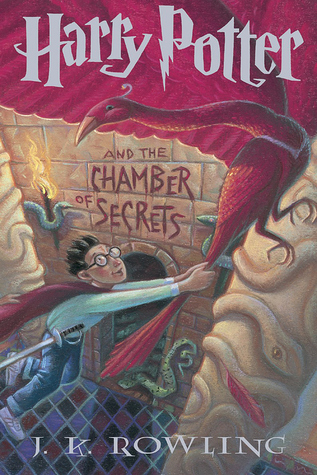

In [77]:
image_downloader(df['coverImg'][126])

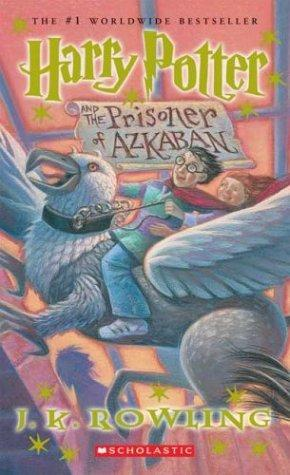

In [78]:
image_downloader(df['coverImg'][93])